In [1]:
import pandas as pd
import numpy as np
df =  pd.read_csv("joined_data_refined.csv",keep_default_na=False, na_values=[""])
df.isnull().sum()

Unnamed: 0        0
Store             0
Dept              0
Size              0
Date              0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
IsHoliday         0
Type_A            0
Type_B            0
Type_C            0
month             0
quarter           0
dayofweek_name    0
is_weekend        0
dtype: int64

In [2]:
import seaborn as sns
sns.set_theme()
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
df['year'] = pd.to_datetime(df['Date'],format="%Y-%m-%d").dt.year.astype(int)
df['day'] = pd.to_datetime(df['Date'],format="%Y-%m-%d").dt.day.astype(int)
del df['Unnamed: 0']
del df['Date']
del df['is_weekend']
del df['Type_A']
del df['quarter']
del df['MarkDown4']
del df['dayofweek_name']
print(df.head())
# corr = df.corr()
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr, annot=True)
# plt.plot()

   Store  Dept    Size  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0      1     1  151315      24924.50        42.31       2.572  211.096358   
1      1     1  151315      46039.49        38.51       2.548  211.242170   
2      1     1  151315      41595.55        39.93       2.514  211.289143   
3      1     1  151315      19403.54        46.63       2.561  211.319643   
4      1     1  151315      21827.90        46.50       2.625  211.350143   

   Unemployment  MarkDown1  MarkDown2  MarkDown3  MarkDown5  IsHoliday  \
0         8.106        0.0        0.0        0.0        0.0      False   
1         8.106        0.0        0.0        0.0        0.0       True   
2         8.106        0.0        0.0        0.0        0.0      False   
3         8.106        0.0        0.0        0.0        0.0      False   
4         8.106        0.0        0.0        0.0        0.0      False   

   Type_B  Type_C  month  year  day  
0       0       0      2  2010    5  
1       0       

In [4]:
X = df.copy()
del X['Weekly_Sales']
y = df['Weekly_Sales']
y = y.values.reshape(-1, 1)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.2, random_state=0)
X_train.columns
X_train.head()

,Store,Dept,Size,Temperature,Fuel_Price,CPI,Unemployment,MarkDown1,MarkDown2,MarkDown3,MarkDown5,IsHoliday,Type_B,Type_C,month,year,day
19436,2,92,202307,65.80,2.720,211.471329,8.163,0.00,0.00,0.00,0.00,False,0,0,10,2010,15
226228,24,1,203819,65.56,3.937,136.314500,8.358,0.00,0.00,0.00,0.00,False,0,0,9,2011,16
413007,45,18,118221,64.89,3.985,192.170412,8.667,5046.74,0.00,18.82,2340.01,False,1,0,10,2012,5
124132,13,54,219622,80.42,3.537,130.719581,5.765,6699.60,96.56,5.20,6650.26,False,0,0,7,2012,27
307742,32,35,203007,64.05,3.659,198.126718,7.872,6238.21,77.77,23.41,8346.74,False,0,0,9,2012,14


In [6]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# X_train = std_scaler.fit_transform(X_train)
# X_test = std_scaler.transform(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

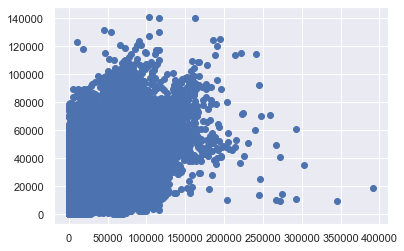

In [8]:
plt.scatter(y_test,y_pred_knn)
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
print(mean_absolute_error(y_test,y_pred_knn))
print(mean_squared_error(y_test,y_pred_knn))
print(knn.score(X_test, y_test)*100)

11407.692288602262
338192552.42034084
34.399709579864634
